In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv('headbrain.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


array([[<AxesSubplot:title={'center':'Gender'}>,
        <AxesSubplot:title={'center':'Age Range'}>],
       [<AxesSubplot:title={'center':'Head Size(cm^3)'}>,
        <AxesSubplot:title={'center':'Brain Weight(grams)'}>]],
      dtype=object)

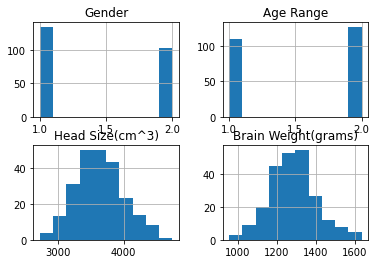

In [4]:
data.hist()

In [5]:
data.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


array([[<AxesSubplot:xlabel='Gender', ylabel='Gender'>,
        <AxesSubplot:xlabel='Age Range', ylabel='Gender'>,
        <AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Gender'>,
        <AxesSubplot:xlabel='Brain Weight(grams)', ylabel='Gender'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Age Range'>,
        <AxesSubplot:xlabel='Age Range', ylabel='Age Range'>,
        <AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Age Range'>,
        <AxesSubplot:xlabel='Brain Weight(grams)', ylabel='Age Range'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Head Size(cm^3)'>,
        <AxesSubplot:xlabel='Age Range', ylabel='Head Size(cm^3)'>,
        <AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Head Size(cm^3)'>,
        <AxesSubplot:xlabel='Brain Weight(grams)', ylabel='Head Size(cm^3)'>],
       [<AxesSubplot:xlabel='Gender', ylabel='Brain Weight(grams)'>,
        <AxesSubplot:xlabel='Age Range', ylabel='Brain Weight(grams)'>,
        <AxesSubplot:xlabel='Head Size(cm^3)', ylabel='Brain 

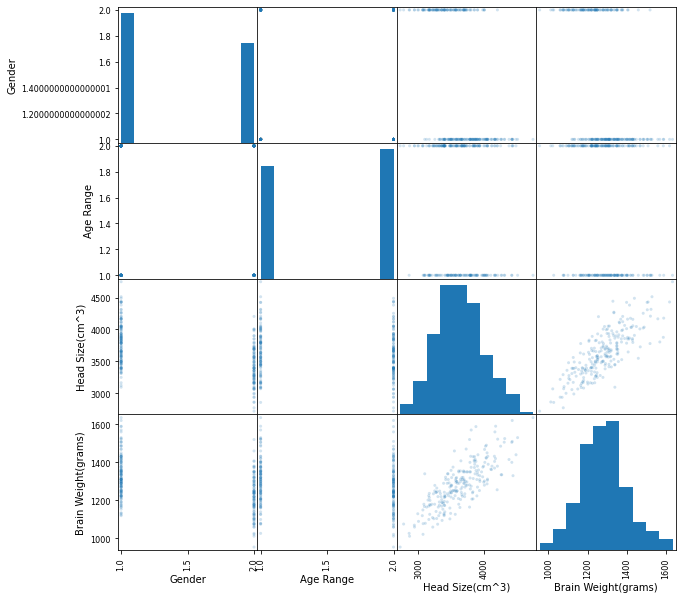

In [6]:
scatter_matrix(data, alpha=0.2, figsize=(10, 10))

In [7]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [8]:
# Collecting X and Y
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values
print(x)
print(x[1])
print(len(x))

[4512 3738 4261 3777 4177 3585 3785 3559 3613 3982 3443 3993 3640 4208
 3832 3876 3497 3466 3095 4424 3878 4046 3804 3710 4747 4423 4036 4022
 3454 4175 3787 3796 4103 4161 4158 3814 3527 3748 3334 3492 3962 3505
 4315 3804 3863 4034 4308 3165 3641 3644 3891 3793 4270 4063 4012 3458
 3890 4166 3935 3669 3866 3393 4442 4253 3727 3329 3415 3372 4430 4381
 4008 3858 4121 4057 3824 3394 3558 3362 3930 3835 3830 3856 3249 3577
 3933 3850 3309 3406 3506 3907 4160 3318 3662 3899 3700 3779 3473 3490
 3654 3478 3495 3834 3876 3661 3618 3648 4032 3399 3916 4430 3695 3524
 3571 3594 3383 3499 3589 3900 4114 3937 3399 4200 4488 3614 4051 3782
 3391 3124 4053 3582 3666 3532 4046 3667 2857 3436 3791 3302 3104 3171
 3572 3530 3175 3438 3903 3899 3401 3267 3451 3090 3413 3323 3680 3439
 3853 3156 3279 3707 4006 3269 3071 3779 3548 3292 3497 3082 3248 3358
 3803 3566 3145 3503 3571 3724 3615 3203 3609 3561 3979 3533 3689 3158
 4005 3181 3479 3642 3632 3069 3394 3703 3165 3354 3000 3687 3556 2773
 3058 

In [9]:
#In order to find the value of m and c, you first need to calculate the mean of X and Y
mean_x=np.mean(x)
mean_y=np.mean(y)

# Total number of values
n = len(x)

In [10]:
# Using the formula to calculate m and c
numer = 0
denom = 0
for i in range(n):
    numer += (x[i] - mean_x) * (y[i] - mean_y)
    denom += (x[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
    y=m*x+c
 
# Print coefficients
print(m, c)

0.2814626504171318 260.04052131790183


In [11]:
# Plotting Values and Regression Line
max_x = np.max(x) + 100
min_x = np.min(x) - 100
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x 

### Plotting Linear Regression Line
#### Now that we have the equation of the line. So for each actual value of x, we will find the predicted values of y. Once we get the points we can plot them over and create the Linear Regression Line,

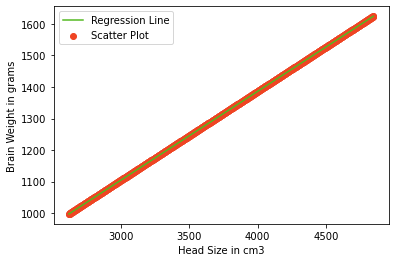

In [13]:
# Ploting Line
plt.plot(x, y, color='#52b920', label='Regression Line')
# Ploting Scatter Points
plt.scatter(x, y, c='#ef4423', label='Scatter Plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

### R Square Method – Goodness of Fit
##### R–squared value is the statistical measure to show how close the data are to the fitted regression line. y = actual value, y ̅ = mean value of y, yp =  predicted value of y
#### R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!
#### R square – Implementation using Python

In [14]:
#ss_t is the total sum of squares and ss_r is the total sum of squares of residuals(relate them to the formula).
ss_t = 0
ss_r = 0
for i in range(n):
    y_pred = c + m * x[i]
    ss_t += (y[i] - mean_y) ** 2
    ss_r += (y[i] - y_pred) ** 2
    r2 = 1 - (ss_r/ss_t)
print(r2)

1.0


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# Cannot use Rank 1 matrix in scikit learn
X = x.reshape(m, -1)
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(x, y)
# Y Prediction
Y_pred = reg.predict(x)
 
# Calculating R2 Score
r2_score = reg.score(x, y)
 
print(r2_score)

TypeError: 'numpy.float64' object cannot be interpreted as an integer